(800, 800)


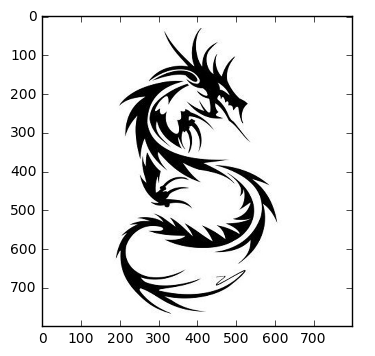

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import colorsys
from PIL import Image

img = Image.open('dragon.jpg')
img = img.convert('RGB')

print(img.size)
plt.imshow(img)


In [2]:
TILE_SIZE = 10

class Tile:
    def get_pixel(self, row, col):
        return self.pixels[row][col]
    
    def to_binary(self):
        binary = [bin(x)[2:].zfill(8) for x in self.pixels.flatten()]
        return np.array([list(map(int, x)) for x in binary]).flatten()
    
    def __init__(self, pixels):
        self.pixels = pixels    

In [3]:
WIDTH = img.size[0]
HEIGHT = img.size[1]

WIDTH_TILES = WIDTH // TILE_SIZE
HEIGHT_TILES = HEIGHT // TILE_SIZE

def get_tiles_from_img(img):
    img_data = np.array(img.getdata()).reshape(WIDTH, HEIGHT, 3) 
    print("Img data shape: ", img_data.shape)
    
    tiles = []
    for row in range(HEIGHT_TILES):
        for col in range(WIDTH_TILES):
            
            pixels = []
            count = 0
            for offset_row in range(TILE_SIZE):
                for offset_col in range(TILE_SIZE):
                    pixels.append(img_data[row * TILE_SIZE + offset_row][col * TILE_SIZE + offset_col])
                
            tiles.append(Tile(np.array(pixels).reshape(TILE_SIZE, TILE_SIZE, 3)))
    
    return np.array(tiles)

In [4]:
def show_tiles(tiles):
    reshaped_tiles = tiles.reshape(WIDTH_TILES, HEIGHT_TILES)
    pixels = np.empty([WIDTH, HEIGHT, 3])
    for row in range(HEIGHT_TILES):
        for col in range(WIDTH_TILES):
            for offset_row in range(TILE_SIZE):
                for offset_col in range(TILE_SIZE):
                    tile = reshaped_tiles[row][col]
                    pixels[row * TILE_SIZE + offset_row][col * TILE_SIZE + offset_col] = tile.get_pixel(offset_row, offset_col)
    im = Image.fromarray(np.uint8(pixels))
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Original')
    
    plt.subplot(1,2,2)
    plt.imshow(im)
    plt.title('Predicted')
    
def to_dec(binary):
    binary = map(str, binary)
    return int(''.join(binary), 2)
    
def show_images(predicted):
    tiles = []
    for pred in predicted:
        reshaped = pred.reshape(TILE_SIZE * TILE_SIZE * 3, 8)
        pixels = [to_dec(x) for x in reshaped]
        tiles.append(Tile(np.array(pixels).reshape(TILE_SIZE, TILE_SIZE, 3)))
        
    show_tiles(np.array(tiles))

In [5]:
if WIDTH % TILE_SIZE != 0 or HEIGHT % TILE_SIZE != 0:
    raise Exception("Unsupported combination of tile size / img size")   

In [6]:
tiles = get_tiles_from_img(img)

train_x = [t.to_binary() for t in tiles]
train_y = np.copy(train_x)


Img data shape:  (800, 800, 3)


C:\Anaconda2\envs\py3k\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Model score (train data):  0.700625


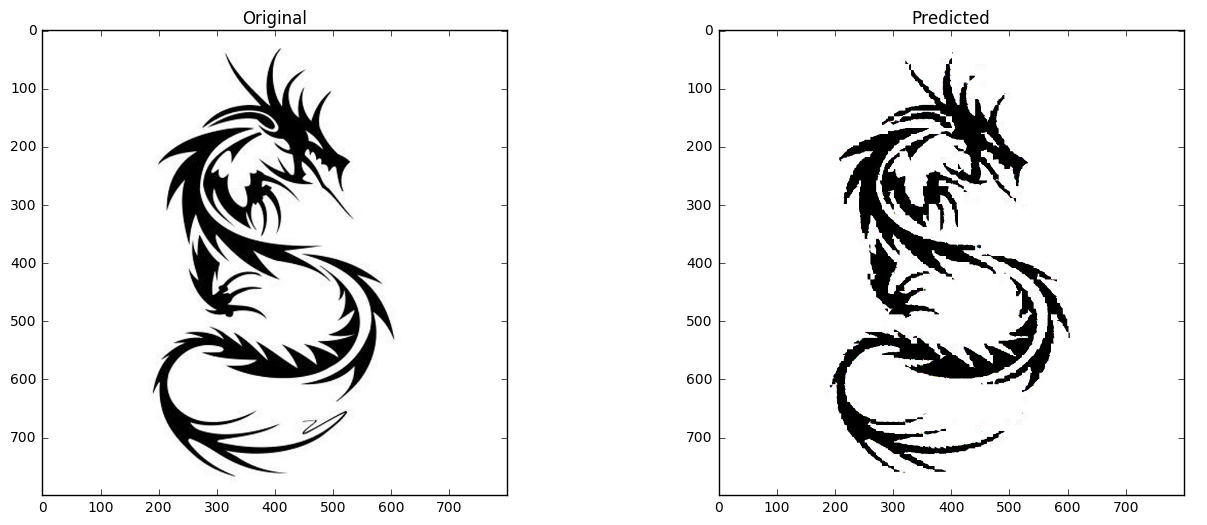

In [14]:
from sklearn import neural_network as nn
clf = nn.MLPClassifier(hidden_layer_sizes=(16, ),
                       activation='relu',
                       solver='adam',
                       alpha=0.0001,
                       shuffle=True,
                       verbose=False,
                       warm_start=True,
                       tol=0.00001,
                       max_iter=10,
                       learning_rate='constant',
                       learning_rate_init=0.001)

model = clf.fit(train_x, train_y)
print("Model score (train data): ", model.score(train_x, train_y))

predicted = model.predict(train_x)
show_images(predicted)

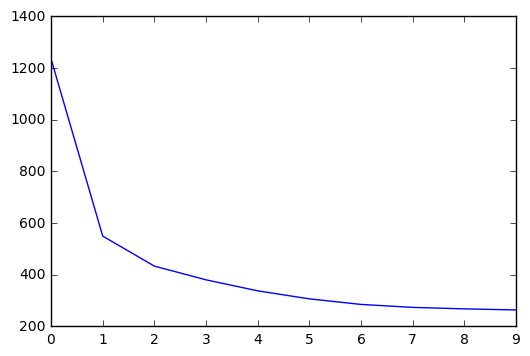

In [15]:
plt.plot(model.loss_curve_)